In [1]:
# %matplotlib Qt
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from modules import Perceptron

In [3]:
data = pd.read_csv('data/Surgical-deepnet.csv')
data

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,...,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,...,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,...,0.00,0,0,7.88,11,0,0,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14630,18.79,14.1,1,0,1,0,0,0,0,0,...,-0.54,1,0,7.78,0,1,0,-0.16,1,1
14631,19.65,12.6,0,0,0,0,0,0,0,0,...,-1.42,4,0,8.40,6,1,0,-0.77,1,1
14632,14.84,12.6,1,0,0,0,0,0,0,0,...,0.65,0,0,13.25,3,3,0,0.99,1,1
14633,17.75,8.9,0,0,1,0,0,0,1,0,...,-0.50,0,1,8.30,5,0,0,0.17,1,1


In [4]:
data.isnull().sum()

bmi                    0
Age                    0
asa_status             0
baseline_cancer        0
baseline_charlson      0
baseline_cvd           0
baseline_dementia      0
baseline_diabetes      0
baseline_digestive     0
baseline_osteoart      0
baseline_psych         0
baseline_pulmonary     0
ahrq_ccs               0
ccsComplicationRate    0
ccsMort30Rate          0
complication_rsi       0
dow                    0
gender                 0
hour                   0
month                  0
moonphase              0
mort30                 0
mortality_rsi          0
race                   0
complication           0
dtype: int64

In [5]:
X = data.drop('complication', axis=1).copy().values
Y = data[['complication']].copy().values

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)


In [7]:
learning_rate_w = 0.0001
learning_rate_b = 0.001
Epoch = 0
stop_condition = False
loss_threshold = 0.001  # Threshold for stopping condition

In [8]:
model = Perceptron(input_size=X_train.shape[1], lr_w=learning_rate_w, lr_b=learning_rate_b, epoch=Epoch, loss_threshold=loss_threshold)
model.fit(X_train, Y_train)

Epoch 1, Loss: 0.31030470501695273
Epoch 2, Loss: 0.2904182459237432
Epoch 3, Loss: 0.29265375565014484
Epoch 4, Loss: 0.2955547463843429
Epoch 5, Loss: 0.2982394979160281
Epoch 6, Loss: 0.30022116885345707
Epoch 7, Loss: 0.30143994418986225
Epoch 8, Loss: 0.30207750756952223
Epoch 9, Loss: 0.30234629719699135
Epoch 10, Loss: 0.3024060412914231
Epoch 11, Loss: 0.30235840690299887
Epoch 12, Loss: 0.3022629199814457
Epoch 13, Loss: 0.3021525090150634
Epoch 14, Loss: 0.3020443583815207
Epoch 15, Loss: 0.30194667342547316
Epoch 16, Loss: 0.30186268785518455
Epoch 17, Loss: 0.30179297460141624
Epoch 18, Loss: 0.30173675549948575
Epoch 19, Loss: 0.3016926323469628
Epoch 20, Loss: 0.3016589873297098
Epoch 21, Loss: 0.30163419589800233
Epoch 22, Loss: 0.3016167339630655
Epoch 23, Loss: 0.3016052260841818
Epoch 24, Loss: 0.30159846120830863
Epoch 25, Loss: 0.30159539106239597
Epoch 26, Loss: 0.3015951197624268


In [9]:
model.evaluate(X_test, Y_test)

(0.23761477709036039, 0.7762213870857533)

In [10]:
Y_pred = model.predict(X_test)
Y_pred = np.where(Y_pred > 0.5, 1, 0)

In [11]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[2094,   57],
       [ 598,  178]], dtype=int64)

In [12]:
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_percent

array([[0.9735007 , 0.0264993 ],
       [0.77061856, 0.22938144]])

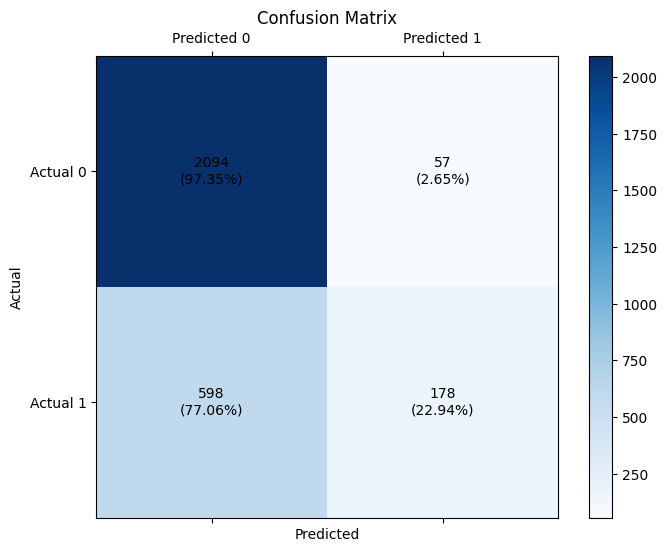

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))

cax = ax.matshow(cm, cmap='Blues')
plt.colorbar(cax)

ax.set_xticks(np.arange(len(cm)))
ax.set_yticks(np.arange(len(cm)))

ax.set_xticklabels(['Predicted 0', 'Predicted 1'])
ax.set_yticklabels(['Actual 0', 'Actual 1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')

for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f'{val}\n({cm_percent[i, j]*100:.2f}%)', ha='center', va='center', color='black')

plt.title('Confusion Matrix')
plt.show()